# Sentiment Analysis

## Mounting and Reading **files**

In [ ]:
# Text Analytics for NetServ sample data using the code in MP's book

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Netserv Project NLP/Data/Sentences_Rating_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Netserv Project NLP/Data/Sentences_Rating_2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Netserv Project NLP/Data/Sentences_Rating_3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Netserv Project NLP/Data/Sentences_Rating_4.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Netserv Project NLP/Data/Sentences_Rating_5.csv")

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [ ]:
df.head(10)

,industry,review_comment,rating
0,Airport,Absolutely atrocious. If I could give zero sta...,1
1,Airport,Almost all the restaurants close about 3 so if...,1
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1
3,Airport,"It was a Night mare,in every way possible.",1
4,Airport,"Always busy, wait times are terrible.",1
5,Airport,Very busy with no stopping had to ride the loo...,1
6,Airport,You say you are following CDC guidelines and y...,1
7,Airport,Your lucky if your plane is fit to fly out of ...,1
8,Airport,The staff that works for Spirit Airlines is ve...,1
9,Airport,Very unorganized and bad customer support,1


In [ ]:
df.shape

(15051, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15051 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   industry        15051 non-null  object
 1   review_comment  15051 non-null  object
 2   rating          15051 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 470.3+ KB


In [ ]:
## Rename columns in the larger df
df = df.rename(columns={'review_comment': 'Statement', 'rating': 'Rating_5P', 'industry' : 'Industry'})

In [ ]:
df.columns

Index(['Industry', 'Statement', 'Rating_5P'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15051 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Industry   15051 non-null  object
 1   Statement  15051 non-null  object
 2   Rating_5P  15051 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 470.3+ KB


In [ ]:
# create a duplicate of column 'B' called 'B_copy'
df = df.assign(Rating_3P=df['Rating_5P'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15051 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Industry   15051 non-null  object
 1   Statement  15051 non-null  object
 2   Rating_5P  15051 non-null  int64 
 3   Rating_3P  15051 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 587.9+ KB


In [ ]:
# replace all occurrences of 5 and 4 with 3 and 1 and 2 with 1
df.Rating_3P = df.Rating_3P.replace({5: 3, 4: 3, 3: 2, 2: 1, 1: 1})

In [ ]:
df.Rating_5P.value_counts()

2    3085
5    3000
4    2995
3    2988
1    2983
Name: Rating_5P, dtype: int64

In [ ]:
df.Rating_3P.value_counts()

1    6068
3    5995
2    2988
Name: Rating_3P, dtype: int64

## Data Preprocessing

In [ ]:
# replace the string "(Translated by google)" with an empty string
df['Statement'] = df['Statement'].str.replace('(Translated by Google)', '')

In [ ]:
# replace the string "(Original)" with an empty string
df['Statement'] = df['Statement'].str.replace('(Original)', '')

In [ ]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is the (Original) sentence extra text',
                            'Another Original sentence extra text',
                            'Yet another (original) sentence']})

# replace the regular expression pattern with an empty string
dfx['text'] = dfx['text'].str.replace(r'\s*\(\s*Original\s*\).*$', '')

print(dfx)

                                   text
0                           This is the
1  Another Original sentence extra text
2       Yet another (original) sentence


In [ ]:
# replace the regular expression pattern with an empty string
df['Statement'] = df['Statement'].str.replace(r'\s*\(\s*Original\s*\).*$', '')

In [ ]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is a sentence with https://example.com',
                            'Another sentence with https://example.org']})

# replace the regular expression pattern with an empty string
dfx['text'] = dfx['text'].str.replace(r'https://\S+', '')

# print the updated DataFrame
print(dfx)

                       text
0  This is a sentence with 
1    Another sentence with 


In [ ]:
# replace the regular expression pattern with an empty string
df['Statement'] = df['Statement'].str.replace(r'https://\S+', '')

In [ ]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is **a sentence with **more than two* stars',
                            'Another sentence with one ***star',
                            'Yet another sentence with ****four* stars']})

# replace the regular expression pattern with the word "foul"
dfx['text'] = dfx['text'].str.replace(r'\*{3,}', '(FOUL)')

# print the updated DataFrame
print(dfx)

                                               text
0  This is **a sentence with **more than two* stars
1              Another sentence with one (FOUL)star
2       Yet another sentence with (FOUL)four* stars


In [ ]:
# replace the regular expression pattern with the word "foul"
df['Statement'] = df['Statement'].str.replace(r'\*{3,}', '(FOUL)')

In [ ]:
#! pip install emoji

In [ ]:
!pip install --upgrade emoji

import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=b01736373c0a67da42a90f6a75338ab94e9fb6b805179b56fa1347957763c021
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
# define a function to replace emoji special characters with words

def replace_emoji(sentence):
    return emoji.demojize(sentence)

# Assuming that the dataframe is named df and the column with sentences is named 'text'
df['Statement'] = df['Statement'].apply(replace_emoji)

df.head(20)

,Industry,Statement,Rating_5P,Rating_3P
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1
1,Airport,Almost all the restaurants close about 3 so if...,1,1
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1
3,Airport,"It was a Night mare,in every way possible.",1,1
4,Airport,"Always busy, wait times are terrible.",1,1
5,Airport,Very busy with no stopping had to ride the loo...,1,1
6,Airport,You say you are following CDC guidelines and y...,1,1
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1
8,Airport,The staff that works for Spirit Airlines is ve...,1,1
9,Airport,Very unorganized and bad customer support,1,1


In [ ]:
import re

# define a function to extract all words beginning and ending with : in a sentence
def extract_emojis(sentence):
    return re.findall(r':\w+:', sentence)

# apply the function to each sentence in the dataframe
df['Emoji Extracted'] = df['Statement'].apply(extract_emojis)

# show the resulting dataframe
df.head(20)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[]
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[]
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[]
3,Airport,"It was a Night mare,in every way possible.",1,1,[]
4,Airport,"Always busy, wait times are terrible.",1,1,[]
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[]
6,Airport,You say you are following CDC guidelines and y...,1,1,[]
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[]
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[]
9,Airport,Very unorganized and bad customer support,1,1,[]


In [ ]:
# Remove exact duplicates which are exactly same in the Statements column of the dataframe
df = df.drop_duplicates(subset='Statement')

In [ ]:
# abbreviate shortforms of words in sentences in a dataframe column using a contractions package 
! pip install contractions
import pandas as pd
import contractions

# define a function to abbreviate the contractions in each sentence
def abbreviate_contractions(sentence):
    return contractions.fix(sentence)

# apply the function to the 'sentences' column using the apply method
df['Abbreviated_Statement'] = df['Statement'].apply(abbreviate_contractions)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 31.2 MB/s eta 0:00:00


In [ ]:
# print the result
df.iloc[30:41]

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement
30,Airport,Two weeks in a row there was serious issues wi...,1,1,[],Two weeks in a row there was serious issues wi...
31,Airport,The south side (delta) traffic management is s...,1,1,[],The south side (delta) traffic management is s...
32,Airport,The worst airport I've ever had the misfortune...,1,1,[],The worst airport I have ever had the misfortu...
33,Airport,The security process is so ridiculous!! To hav...,1,1,"[:sad_but_relieved_face:, :sad_but_relieved_fa...",The security process is so ridiculous!! To hav...
34,Airport,insane week… special s/o to pax for trying to ...,1,1,[],insane week… special s/o to pax for trying to ...
35,Airport,Absolutely disgusting as usual. At least it's...,1,1,[],Absolutely disgusting as usual. At least it i...
36,Airport,The tsa pre check and clear lines are getting ...,1,1,[],The tsa pre check and clear lines are getting ...
37,Airport,Park your car to get it stolen! Talk about the...,1,1,[],Park your car to get it stolen! Talk about the...
38,Airport,Southwest was so unprofessional !! The line wa...,1,1,[],Southwest was so unprofessional !! The line wa...
39,Airport,Food needs to be available after 10p in the B ...,1,1,[],Food needs to be available after 10p in the B ...


In [ ]:
# write the DataFrame to a CSV file and save it in a specific folder
# df.to_csv('df.csv', index=False)

In [ ]:
# download the CSV file to your local machine
# from google.colab import files 
# files.download('df.csv')

## EDA

In [ ]:
# Create Count Plot
plt.figure(figsize=(6,5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

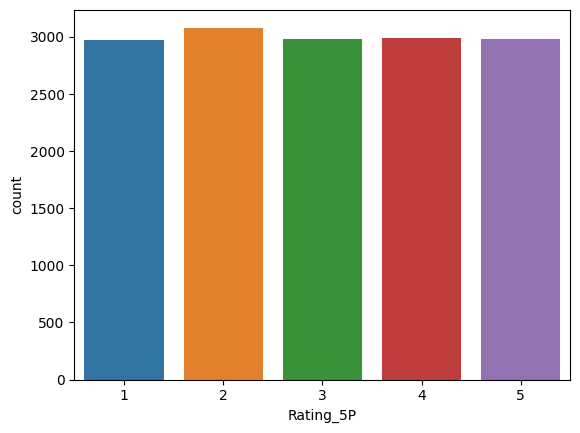

In [ ]:
ax = sns.countplot( x='Rating_5P',data=df)

In [ ]:
# Create wordclouds
# !pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# combine all the sentences in the 'text' column into a single string for overall sentences
text = " ".join(sentence for sentence in df["Statement"])
wordcloud = WordCloud().generate(text)

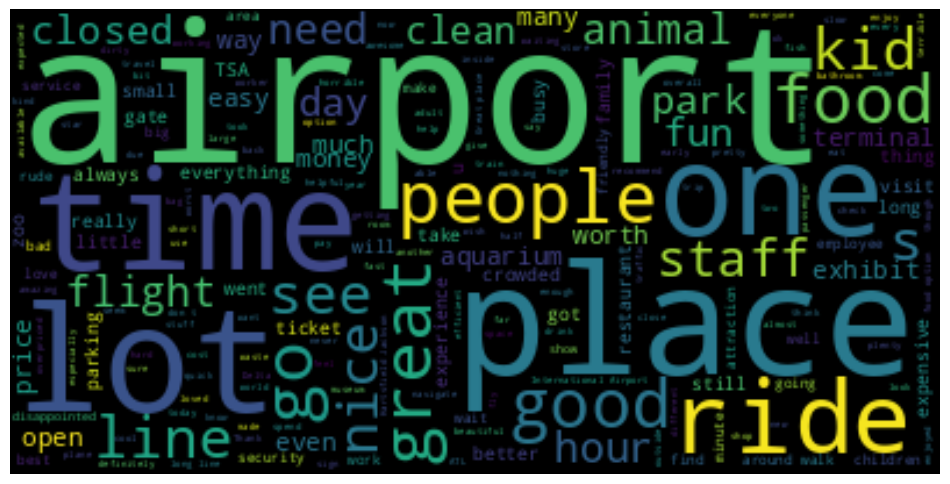

In [ ]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# combine all the sentences in the 'text' column into a single string with a filter column

df_filtered = df[df["Rating_3P"] == 1]
text = " ".join(sentence for sentence in df_filtered["Statement"])
wordcloud = WordCloud().generate(text)

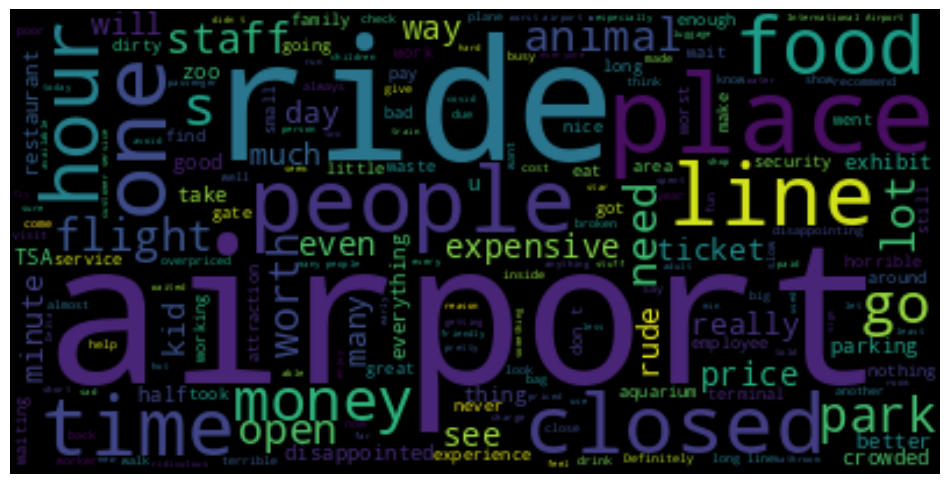

In [ ]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_filtered.shape[0]

6057

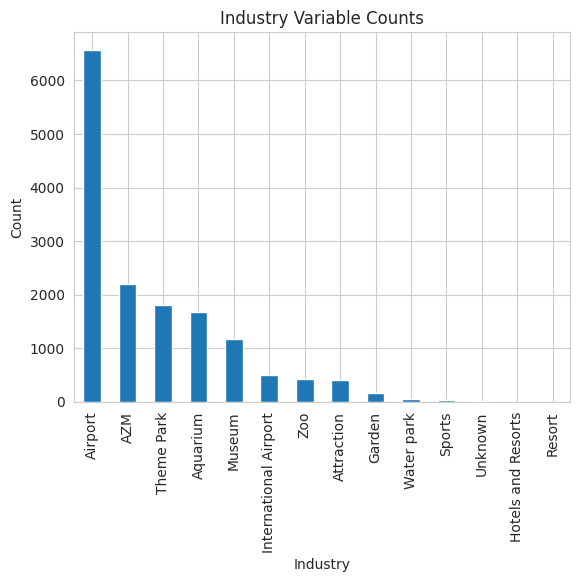

In [ ]:
industry_counts = df['Industry'].value_counts()
industry_counts.plot(kind='bar')
plt.title('Industry Variable Counts')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['Industry', 'Statement', 'Rating_5P', 'Rating_3P', 'Emoji Extracted',
       'Abbreviated_Statement'],
      dtype='object')

In [ ]:
df_copy = df.copy()

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# POS (Parts of Speech) Tagging

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Define a function to perform POS tagging on a sentence
def pos_tagging(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply the function to the DataFrame column
df['pos_tags'] = df['Statement'].apply(pos_tagging)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df.head(10)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,pos_tags
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur..."
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and..."
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),..."
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)..."
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),..."
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP..."
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P..."
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ..."
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba..."


In [ ]:
# Split the dataframe based on the rating
# Positives_df = df[(df['Rating_5P'] == 4) | (df['Rating_5P'] == 5)]
# Negatives_df = df[(df['Rating_5P'] == 1) | (df['Rating_5P'] == 2)]

In [ ]:
nltk.download('opinion_lexicon')
# Define a function to do POS tagging and return a list of adjectives
def get_adjectives(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    return adjectives

# Apply the function to the dataframe to create a new column with adjectives
df['adjectives'] = df['Statement'].apply(get_adjectives)

# Flatten the list of adjectives into a single list
all_adjectives = [adj for adj_list in df['adjectives'] for adj in adj_list]

# Create a frequency distribution of the adjectives
fdist = nltk.FreqDist(all_adjectives)

# Get the top 10 most frequent positive adjectives
positive_adjectives = [word for word, freq in fdist.most_common() if word in nltk.corpus.opinion_lexicon.positive()][:10]

# Get the top 10 most frequent negative adjectives
negative_adjectives = [word for word, freq in fdist.most_common() if word in nltk.corpus.opinion_lexicon.negative()][:10]

# Print the results
print('Top positive adjectives:', positive_adjectives)
print('Top negative adjectives:', negative_adjectives)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


Top positive adjectives: ['good', 'great', 'nice', 'clean', 'easy', 'better', 'best', 'friendly', 'helpful', 'cool']
Top negative adjectives: ['expensive', 'bad', 'rude', 'disappointed', 'worst', 'hard', 'slow', 'crowded', 'horrible', 'terrible']


In [ ]:
df.head(10)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,pos_tags,adjectives
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I...","[atrocious, rude, inefficient, efficient, nece..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur...",[]
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and...",[closed]
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),...",[possible]
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)...","[busy, wait, terrible]"
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),...",[busy]
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP...",[real]
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P...","[lucky, fit, second]"
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ...","[rude, nappy]"
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba...","[unorganized, bad]"


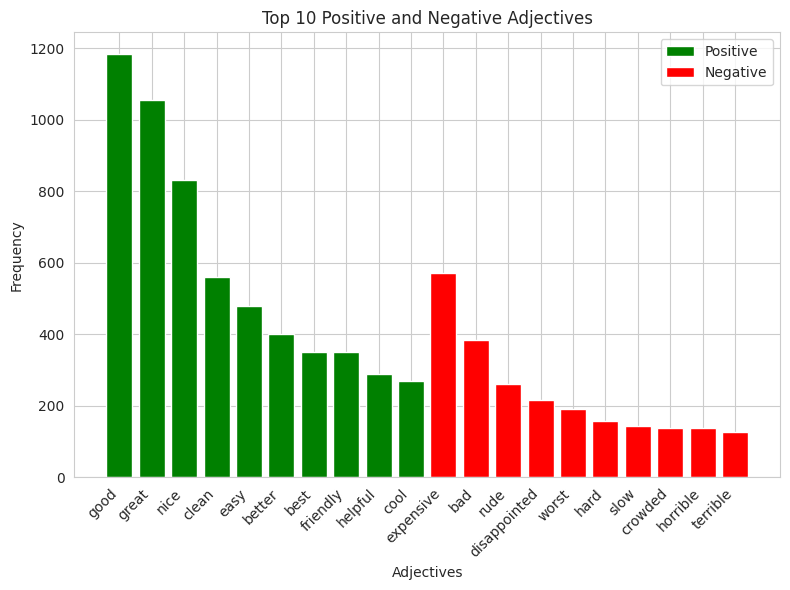

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import opinion_lexicon
from nltk import pos_tag
from collections import Counter

# define a function to get the adjectives from a sentence
def get_adjectives(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word for word, pos in tagged_tokens if pos.startswith('JJ')]
    return adjectives

# get the top 10 most frequent positive adjectives
positive_adjectives = []
for sentence in df['Statement']:
    adjectives = get_adjectives(sentence)
    positive_adjectives += [word for word in adjectives if word in opinion_lexicon.positive() and len(word) > 2]
freq_pos = Counter(positive_adjectives).most_common(10)

# get the top 10 most frequent negative adjectives
negative_adjectives = []
for sentence in df['Statement']:
    adjectives = get_adjectives(sentence)
    negative_adjectives += [word for word in adjectives if word in opinion_lexicon.negative() and len(word) > 2]
freq_neg = Counter(negative_adjectives).most_common(10)

# plot the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([x[0] for x in freq_pos], [x[1] for x in freq_pos], color='green', label='Positive')
ax.bar([x[0] for x in freq_neg], [x[1] for x in freq_neg], color='red', label='Negative')
ax.set_xlabel('Adjectives')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Positive and Negative Adjectives')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,pos_tags,adjectives
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I...","[atrocious, rude, inefficient, efficient, nece..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur...",[]
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and...",[closed]
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),...",[possible]
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)...","[busy, wait, terrible]"
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),...",[busy]
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP...",[real]
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P...","[lucky, fit, second]"
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ...","[rude, nappy]"
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba...","[unorganized, bad]"


In [ ]:
# Word associations: Analyze co-occurring words or phrases in each sentiment category to understand the context in which certain words or phrases are used. 
# You can use techniques like association rule mining or co-occurrence matrix analysis.

# Co-occurance Matrix Analysis

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df1 = df

# create a CountVectorizer object
cv = CountVectorizer(stop_words='english', lowercase=True)

# fit and transform the sentences column
sentences_matrix = cv.fit_transform(df1['Statement'])

# create a pandas DataFrame from the co-occurrence matrix
co_occurrence = pd.DataFrame(sentences_matrix.T.dot(sentences_matrix).toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

# remove diagonal values (words that co-occur with themselves)
np.fill_diagonal(co_occurrence.values, 0)

# print the top 10 most common word associations
print(co_occurrence.stack().sort_values(ascending=False)[:50])

airport        international    563
international  airport          563
airport        food             546
food           airport          546
atlanta        airport          524
airport        atlanta          524
nice           airport          518
airport        nice             518
               easy             461
easy           airport          461
people         airport          458
airport        people           458
               clean            446
clean          airport          446
time           airport          442
airport        time             442
               flight           438
flight         airport          438
airport        tsa              432
tsa            airport          432
airport        good             420
good           airport          420
great          airport          414
airport        great            414
long           lines            413
lines          long             413
place          great            379
great          place        

In [ ]:
# Association Mining

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# split the sentences into lists of words
sentences = [sentence.split() for sentence in df1['Statement']]

# create a transaction encoder object
te = TransactionEncoder()

# fit and transform the data
te_ary = te.fit(sentences).transform(sentences)
df1 = pd.DataFrame(te_ary, columns=te.columns_)

# generate frequent itemsets
frequent_itemsets = apriori(df1, min_support=0.05, use_colnames=True)

# generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# put the rules into a dataframe
rules_df = pd.DataFrame({
    'antecedents': rules['antecedents'].apply(lambda x: ', '.join(list(x))),
    'consequents': rules['consequents'].apply(lambda x: ', '.join(list(x))),
    'support': rules['support'],
    'confidence': rules['confidence'],
    'lift': rules['lift']
})

# print the rules dataframe
rules_df.head(10)


,antecedents,consequents,support,confidence,lift
0,I,the,0.161082,0.694628,1.239693
1,It,the,0.053694,0.667771,1.191763
2,It,was,0.052095,0.647887,2.502686
3,The,and,0.092932,0.606786,1.221464
4,The,the,0.108520,0.708569,1.264574
5,had,a,0.052428,0.627092,1.577820
6,a,the,0.250683,0.630741,1.125675
7,airport,the,0.075145,0.639456,1.141228
8,all,and,0.051629,0.632653,1.273536
9,all,the,0.063020,0.772245,1.378215


In [ ]:
rules_df.tail(20)

,antecedents,consequents,support,confidence,lift
302,"the, to, is",and,0.071481,0.663164,1.334955
303,"and, to, is",the,0.071481,0.751401,1.341015
304,"it, the, and",to,0.050763,0.695255,1.399742
305,"it, the, to",and,0.050763,0.679144,1.367123
306,"it, and, to",the,0.050763,0.768145,1.370898
307,"the, and, of",to,0.093465,0.638598,1.285675
308,"the, to, of",and,0.093465,0.666508,1.341687
309,"and, to, of",the,0.093465,0.796254,1.421064
310,"was, the, of",and,0.051695,0.672444,1.353634
311,"was, and, of",the,0.051695,0.810021,1.445634


In [ ]:
df.head(5)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,pos_tags,adjectives
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I...","[atrocious, rude, inefficient, efficient, nece..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur...",[]
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and...",[closed]
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),...",[possible]
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)...","[busy, wait, terrible]"


In [ ]:
import pandas as pd
import nltk

# download the word tokenizer from NLTK
nltk.download('punkt')

# define a function to count the number of words in a string
def count_words(text):
    return len(nltk.word_tokenize(text))

# count the number of words in each review
df['num_words'] = df['Statement'].apply(lambda x: count_words(x))

# calculate the total number of words in the entire DataFrame
total_words = df['num_words'].sum()

print(f'Total number of words: {total_words}')

df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total number of words: 467573


,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,ABSA_sentiments,ABSA_sentiment_score,num_words
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,54
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,29
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,17
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,11
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,8
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,23
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,"{'service': 0.25, 'food': 0.25, 'ambiance': 0,...",3,43
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,43
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,37
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2,6


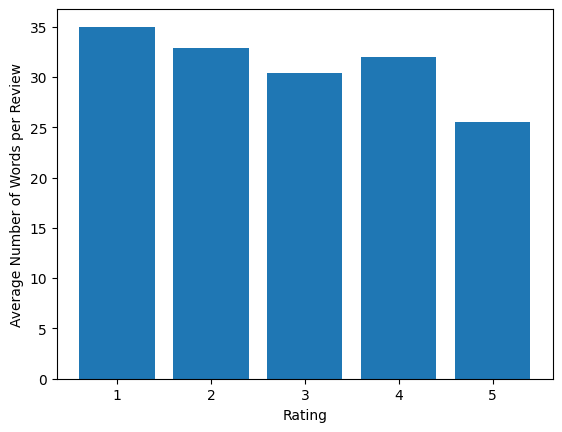

In [ ]:
# code to create a graph where the x-axis is rating and y axis is average number of words per review 
import pandas as pd
import matplotlib.pyplot as plt

# calculate the average number of words per review for each rating level
avg_words = df.groupby('Rating_5P')['num_words'].mean()

# create a bar chart of the average number of words per review by rating
plt.bar(avg_words.index, avg_words.values)
plt.xlabel('Rating')
plt.ylabel('Average Number of Words per Review')
plt.show()


### Some Hypothesis Testings

In [ ]:
# Those who are unhappy are more vocal about their bad experience

# To test whether those who gave a rating of 1 have a higher number of words per review, 
# You could use a two-sample t-test. 
# The null hypothesis would be that there is no difference in the mean number of words per review between those who gave a rating of 1 and those who gave a rating other than 1. 
# The alternative hypothesis would be that those who gave a rating of 1 have a higher mean number of words per review than those who gave a rating other than 1.

# Here's some sample code that performs a two-sample t-test and prints the result:

The mean number of words per review is significantly higher for those who gave a rating of 1.


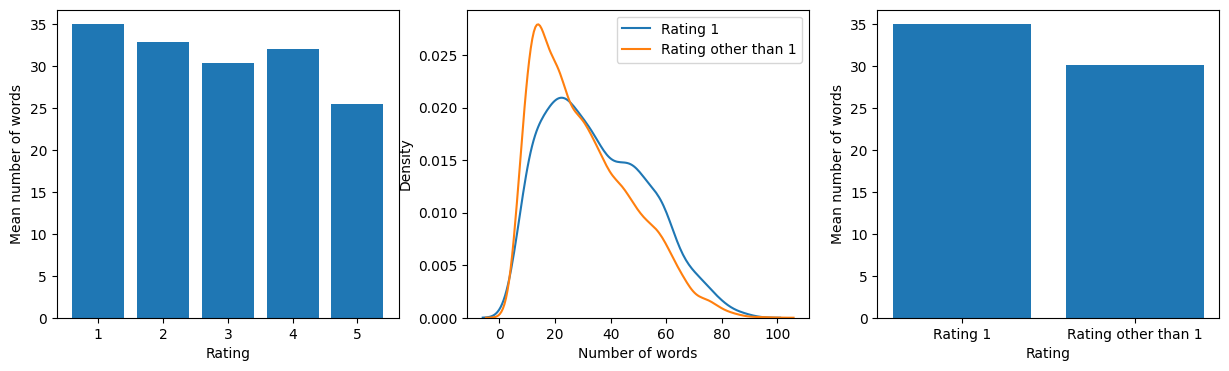

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the mean number of words per rating
means = df.groupby('Rating_5P')['num_words'].mean()

# perform a two-sample t-test comparing the mean number of words for ratings of 1 vs. all other ratings
group1 = df[df['Rating_5P'] == 1]['num_words']
group2 = df[df['Rating_5P'] != 1]['num_words']
t_stat, p_value = stats.ttest_ind(group1, group2)

# print the results of the t-test
if p_value < 0.05:
    print('The mean number of words per review is significantly higher for those who gave a rating of 1.')
else:
    print('There is no significant difference in the mean number of words per review between those who gave a rating of 1 and those who gave a rating other than 1.')

# plot the mean number of words per rating
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
axs[0].bar(means.index, means)
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Mean number of words')

# plot the distribution of number of words per review for each group using seaborn
sns.distplot(group1, hist=False, label='Rating 1', ax=axs[1])
sns.distplot(group2, hist=False, label='Rating other than 1', ax=axs[1])
axs[1].set_xlabel('Number of words')
axs[1].set_ylabel('Density')
axs[1].legend()

# create a bar chart to display the mean number of words per review for each group
axs[2].bar(['Rating 1', 'Rating other than 1'], [group1.mean(), group2.mean()])
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Mean number of words')

plt.show()

The mean number of words per review is significantly higher for reviews without a rating of 5.


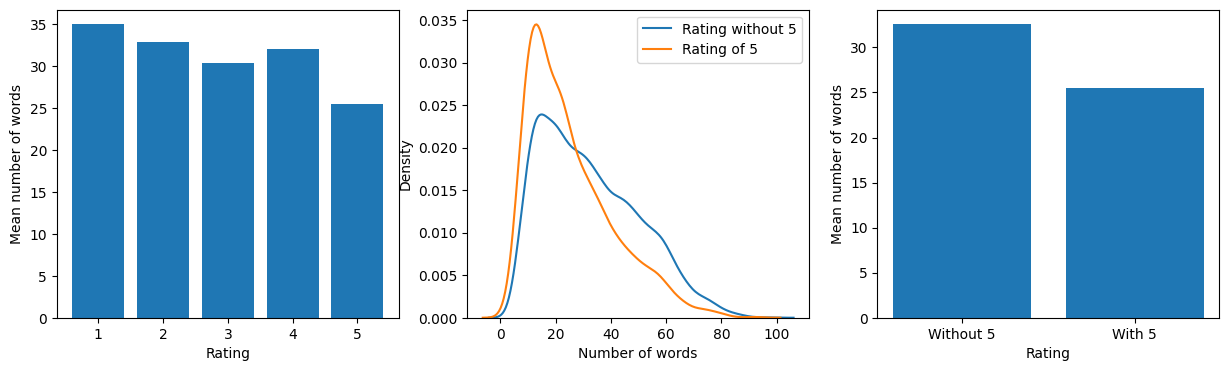

In [ ]:
# Those who are happy are more not very vocal about their good experience

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the mean number of words per rating
means = df.groupby('Rating_5P')['num_words'].mean()

# perform a two-sample t-test comparing the mean number of words for ratings without 5 vs. rating of 5
group1 = df[df['Rating_5P'] != 5]['num_words']
group2 = df[df['Rating_5P'] == 5]['num_words']
t_stat, p_value = stats.ttest_ind(group1, group2)

# print the results of the t-test
if p_value < 0.05:
    print('The mean number of words per review is significantly higher for reviews without a rating of 5.')
else:
    print('There is no significant difference in the mean number of words per review between the reviews without a rating of 5 and the reviews with a rating of 5.')

# plot the mean number of words per rating
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
axs[0].bar(means.index, means)
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Mean number of words')

# plot the distribution of number of words per review for each group using seaborn
sns.distplot(group1, hist=False, label='Rating without 5', ax=axs[1])
sns.distplot(group2, hist=False, label='Rating of 5', ax=axs[1])
axs[1].set_xlabel('Number of words')
axs[1].set_ylabel('Density')
axs[1].legend()

# create a bar chart to display the mean number of words per review for each group
axs[2].bar(['Without 5', 'With 5'], [group1.mean(), group2.mean()])
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Mean number of words')

plt.show()


In [ ]:
# Mann-Whitney U test: This test can be used to compare the distribution of two groups of data that are not normally distributed, such as the sentiment scores of two different products.

import pandas as pd
import scipy.stats as stats

# separate the data by industry
industry1_data = df[df['Industry'] == 'Airport']['Rating_5P']
industry2_data = df[df['Industry'] == 'AZM']['Rating_5P']

# perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(industry1_data, industry2_data)

# print the results
if p_value < 0.05:
    print('There is a significant difference in the distribution of sentiment scores between the two industries.')
else:
    print('There is no significant difference in the distribution of sentiment scores between the two industries.')

There is a significant difference in the distribution of sentiment scores between the two industries.


There is a significant difference in sentiment scores across industries (p < 0.05)


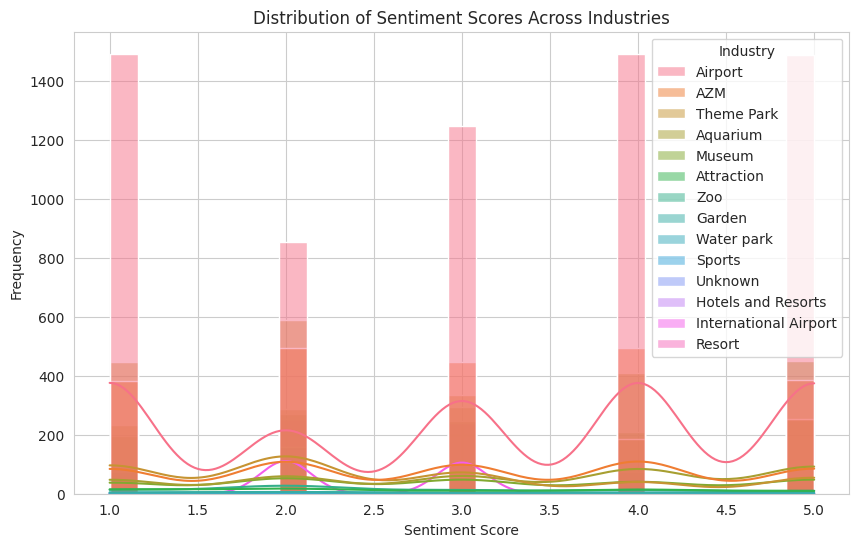

In [ ]:
# Kruskal-Wallis test: This test is similar to the Mann-Whitney U test, but can be used to compare more than two groups.

import pandas as pd
import scipy.stats as stats

# group the data by industry and calculate the median sentiment score for each industry
grouped_data = df.groupby('Industry')['Rating_5P'].median()

# perform a Kruskal-Wallis test to compare sentiment scores across industries
statistic, p_value = stats.kruskal(*[group.values for name, group in df.groupby('Industry')['Rating_5P']])

# print the results of the test
if p_value < 0.05:
    print('There is a significant difference in sentiment scores across industries (p < 0.05)')
else:
    print('There is no significant difference in sentiment scores across industries (p >= 0.05)')

# create a distplot to visualize the distribution of sentiment scores for each industry
sns.set_style('whitegrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='Rating_5P', hue='Industry', kde=True, alpha=0.5, ax=ax)
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sentiment Scores Across Industries')

plt.show()


## Traditional Models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Create a dictionary from the corpus
feature_vector = count_vectorizer.fit(df.Statement)

# get the feature names
features = feature_vector.get_feature_names_out()

# print the feature names
print("Total number of features: ", len(feature_names))

Total number of features:  13953


In [ ]:
# Convert the above dictionary into countvectors using transform

df_features = count_vectorizer.transform(df.Statement)

In [ ]:
df_features.shape

(15011, 13953)

In [ ]:
type(df_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# To know how many non-zero values are present in the matrix we use the function getnnz()

df_features.getnnz()

332028

In [ ]:
# Check how sparse the matrix is, divide the above number by the column row mul of the total matrix

(df_features.getnnz() / (df_features.shape[0]*df_features.shape[1]))*100

# The matrix is less than 1% non zero values, that is, more than 99% values are zeros. This is a very sparse representation

0.1585249008463814

In [ ]:
type(df_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# Convert the above matrix to a dataframe
df_features_df = pd.DataFrame(df_features.todense())
#Setting the column names to the features ie words
df_features_df.columns = features

In [ ]:
df_features_df.head(10)

,00,000,00000,00am,00p,00pm,01,05,0500,06,...,𝐎𝐍𝐄,𝐎𝐍𝐋𝐘,𝐒𝐇𝐎𝐓,𝐘𝐎𝐔,𝗲𝗻𝗷𝗼𝘆𝗲𝗱,𝗴𝗲𝘁𝗮𝘄𝗮𝘆,𝗴𝗶𝗿𝗹,𝗺𝘆,𝘄𝗲𝗲𝗸𝗲𝗻𝗱,𝘄𝗶𝘁𝗵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Write a file to a particular folder

# folder_path = 'E:/VENKY/IIMB BAI 13/NetServ Technologies/Rough'
# csv_file_name = 'df_features_df.csv'
# df_features_df.to_csv(folder_path + '\\' + csv_file_name, index=False)

In [ ]:
df_features_df.iloc[0:5,10:15]

,0627,0630,06pm,07,0700
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
df[0:1]

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[]


In [ ]:
df_features_df[['parking','is','easy','and','the', 'parking','fee','is','reasonable']][0:1]

,parking,is,easy,and,the,parking,fee,is,reasonable
0,0,4,0,2,4,0,0,4,0


Text(0, 0.5, 'Density')

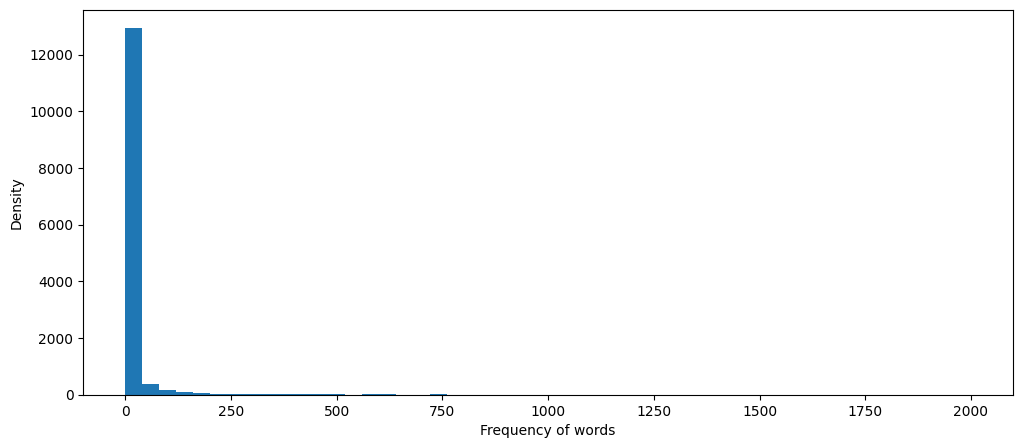

In [ ]:
# Removing low frequency words
# Summing up the occurences of features columwise

features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts_df = pd.DataFrame(dict(features=features, counts = features_counts))

# Print a histogram
plt.figure(figsize = (12,5))
plt.hist(feature_counts_df.counts, bins = 50, range = (0,2000));
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [ ]:
len(feature_counts_df[feature_counts_df.counts == 1])

6630

In [ ]:
# There are 6630 words which are present only once across all documents in the corpus and these can be ignored as these are rare words

In [ ]:
count_vectorizer = CountVectorizer (max_features = 1000)
feature_vector = count_vectorizer.fit(df.Statement)
features = feature_vector.get_feature_names_out()
df_features = count_vectorizer.transform(df.Statement)
features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))

In [ ]:
feature_counts.sort_values('counts', ascending = False)[0:15]

,features,counts
849,the,18171
873,to,12467
66,and,11536
458,it,6870
603,of,6456
360,for,5826
940,was,5815
454,is,5489
442,in,4697
599,not,3882


#### Sentiment Analysis using Naive Bayes Model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_5P']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the text data into a bag of words using CountVectorizer.
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier on the training data.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the testing data.
y_pred = nb_classifier.predict(X_test_bow)

In [ ]:
# Evaluate the performance of the classifier using accuracy score.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5074925074925075


In [ ]:
# Print the classification report and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.60      0.60       591
           2       0.39      0.47      0.42       596
           3       0.41      0.25      0.31       610
           4       0.47      0.55      0.50       613
           5       0.68      0.68      0.68       593

    accuracy                           0.51      3003
   macro avg       0.51      0.51      0.50      3003
weighted avg       0.51      0.51      0.50      3003

Naive Bayes Confusion Matrix:
[[357 170  41  17   6]
 [141 279  78  72  26]
 [ 75 188 152 154  41]
 [ 20  63  79 335 116]
 [ 10  19  23 140 401]]


In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_3P']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the text data into a bag of words using CountVectorizer.
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier on the training data.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the testing data.
y_pred = nb_classifier.predict(X_test_bow)

In [ ]:
# Evaluate the performance of the classifier using accuracy score.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7159507159507159


In [ ]:
# Print the classification report and confusion matrix
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.84      0.77      1187
           2       0.48      0.17      0.25       610
           3       0.76      0.87      0.81      1206

    accuracy                           0.72      3003
   macro avg       0.65      0.63      0.61      3003
weighted avg       0.68      0.72      0.68      3003

Naive Bayes Confusion Matrix:
[[1002   69  116]
 [ 292  102  216]
 [ 118   42 1046]]


#### Sentiment Analysis using TFIDF based LR method

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

# Define X (text) and y (ratings) variables
X = df['Statement']
y = df['Rating_5P']

# Convert text to a TF-IDF vector
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train a logistic regression model on the TF-IDF vectors
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tfidf, y)

# Use the trained model to predict the sentiment of the text
df['TFIDF_LR_Rating_5P'] = clf.predict(X_tfidf)

# Print the classification report for the predicted ratings
print(classification_report(y, df['TFIDF_LR_Rating_5P']))


              precision    recall  f1-score   support

           1       0.78      0.82      0.80      2975
           2       0.71      0.72      0.71      3082
           3       0.72      0.65      0.68      2979
           4       0.74      0.71      0.73      2990
           5       0.83      0.87      0.85      2985

    accuracy                           0.76     15011
   macro avg       0.76      0.76      0.76     15011
weighted avg       0.76      0.76      0.76     15011



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define X (text) and y (ratings) variables
X = df['Statement']
y = df['Rating_3P']

# Convert text to a TF-IDF vector
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train a logistic regression model on the TF-IDF vectors
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tfidf, y)

# Use the trained model to predict the sentiment of the text
df['TFIDF_LR_Rating_3P'] = clf.predict(X_tfidf)

# Print the classification report for the predicted ratings
print(classification_report(y, df['TFIDF_LR_Rating_3P']))

              precision    recall  f1-score   support

           1       0.83      0.93      0.88      6057
           2       0.80      0.48      0.60      2979
           3       0.86      0.92      0.89      5975

    accuracy                           0.84     15011
   macro avg       0.83      0.78      0.79     15011
weighted avg       0.84      0.84      0.83     15011



In [ ]:
df.head(10)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,TFIDF_LR_Rating_5P,TFIDF_LR_Rating_3P
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],1,1
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],1,1
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],1,1
3,Airport,"It was a Night mare,in every way possible.",1,1,[],1,1
4,Airport,"Always busy, wait times are terrible.",1,1,[],3,1
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],2,1
6,Airport,You say you are following CDC guidelines and y...,1,1,[],1,1
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],1,1
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],1,1
9,Airport,Very unorganized and bad customer support,1,1,[],1,1


## Machine Learning Models

#### LR + SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_5P']

In [ ]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Train the SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluate the models
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision: {precision_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_log_reg, average="weighted")}')

Logistic Regression Metrics:
Accuracy: 0.5466666666666666
Precision: 0.5449066337032101
Recall: 0.5466666666666666
F1 Score: 0.5457182207145468


In [ ]:
print('SVM Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_pred_svm, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_svm, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm, average="weighted")}')

SVM Metrics:
Accuracy: 0.5193333333333333
Precision: 0.5123465035879827
Recall: 0.5193333333333333
F1 Score: 0.5150961937998179


In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_3P']

In [ ]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Train the SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluate the models
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision: {precision_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_log_reg, average="weighted")}')

Logistic Regression Metrics:
Accuracy: 0.7333333333333333
Precision: 0.7184012359419701
Recall: 0.7333333333333333
F1 Score: 0.7241103795251665


In [ ]:
print('SVM Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_pred_svm, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_svm, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm, average="weighted")}')

SVM Metrics:
Accuracy: 0.7143333333333334
Precision: 0.6997240564726105
Recall: 0.7143333333333334
F1 Score: 0.7057389337852464


#### LR + Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_5P']

In [ ]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the models
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision: {precision_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_log_reg, average="weighted")}')

Logistic Regression Metrics:
Accuracy: 0.5466666666666666
Precision: 0.5449066337032101
Recall: 0.5466666666666666
F1 Score: 0.5457182207145468


In [ ]:
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf, average="weighted")}')

Random Forest Metrics:
Accuracy: 0.5473333333333333
Precision: 0.5402034762549952
Recall: 0.5473333333333333
F1 Score: 0.5415993965952182


In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_3P']

In [ ]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the models
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision: {precision_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_log_reg, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_log_reg, average="weighted")}')

Logistic Regression Metrics:
Accuracy: 0.7333333333333333
Precision: 0.7184012359419701
Recall: 0.7333333333333333
F1 Score: 0.7241103795251665


In [ ]:
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf, average="weighted")}')

Random Forest Metrics:
Accuracy: 0.7343333333333333
Precision: 0.7161810143163132
Recall: 0.7343333333333333
F1 Score: 0.6973269575836275


#### TFIDF + Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_5P']

In [ ]:
# Convert text data into numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the model
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf, average="weighted")}')

Random Forest Metrics:
Accuracy: 0.5336666666666666
Precision: 0.5285002587599251
Recall: 0.5336666666666666
F1 Score: 0.5284353264119438


In [ ]:
# Print the classification report and confusion matrix
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.61      0.58       584
           2       0.42      0.46      0.44       596
           3       0.48      0.38      0.42       600
           4       0.51      0.45      0.48       604
           5       0.67      0.77      0.72       616

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000

Random Forest Confusion Matrix:
[[355 144  52  20  13]
 [183 275  75  38  25]
 [ 69 133 226 124  48]
 [ 22  65 101 273 143]
 [ 15  33  18  78 472]]


In [ ]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [ ]:
# Preprocess the data
X = df['Statement']
y = df['Rating_3P']

In [ ]:
# Convert text data into numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the model
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf, average="weighted")}')

Random Forest Metrics:
Accuracy: 0.7113333333333334
Precision: 0.6901663564289453
Recall: 0.7113333333333334
F1 Score: 0.6682863238291737


In [ ]:
# Print the classification report and confusion matrix
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.88      0.78      1191
           2       0.58      0.14      0.23       620
           3       0.75      0.84      0.79      1189

    accuracy                           0.71      3000
   macro avg       0.67      0.62      0.60      3000
weighted avg       0.69      0.71      0.67      3000

Random Forest Confusion Matrix:
[[1048   29  114]
 [ 305   88  227]
 [ 155   36  998]]


## Pre-Trained Models 

#### Sentiment analysis using TextBlob

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_analysis_scale_1_to_5(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    sentiment = 0
    if polarity < -0.6:
        sentiment = 1
    elif polarity < -0.2:
        sentiment = 2
    elif polarity < 0.2:
        sentiment = 3
    elif polarity < 0.6:
        sentiment = 4
    else:
        sentiment = 5
    return sentiment

df['Rating_5P_Textblob'] = df['Statement'].apply(sentiment_analysis_scale_1_to_5)

In [ ]:
df.Rating_5P.value_counts()

1    3000
2    3000
3    3000
4    3000
5    3000
Name: Rating_5P, dtype: int64

In [ ]:
df.Rating_5P_Textblob.value_counts()

3    6542
4    4753
5    1774
2    1355
1     576
Name: Rating_5P_Textblob, dtype: int64

In [ ]:
# df.Sentiment_Textblob = 99

In [ ]:
df.loc[df['Rating_5P_Textblob'].isin([4, 5]), 'Rating_3P_Textblob'] = 3
df.loc[df['Rating_5P_Textblob'].isin([3]), 'Rating_3P_Textblob'] = 2
df.loc[df['Rating_5P_Textblob'].isin([2, 1]), 'Rating_3P_Textblob'] = 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statement           15000 non-null  object 
 1   Rating_5P           15000 non-null  int64  
 2   Rating_3P           15000 non-null  int64  
 3   Rating_5P_Textblob  15000 non-null  int64  
 4   Rating_3P_Textblob  15000 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 703.1+ KB


In [ ]:
df['Rating_3P_Textblob'] = df['Rating_3P_Textblob'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Statement           15000 non-null  object
 1   Rating_5P           15000 non-null  int64 
 2   Rating_3P           15000 non-null  int64 
 3   Rating_5P_Textblob  15000 non-null  int64 
 4   Rating_3P_Textblob  15000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 703.1+ KB


In [ ]:
df.head(10)

,Statement,Rating_5P,Rating_3P,Rating_5P_Textblob,Rating_3P_Textblob
0,Lost in Hartsfield I swear I hate ATL airport ...,1,1,1,1
1,Atlanta airport trash 😫,1,1,3,2
2,"flight got fucking canceled, might have to spe...",1,1,2,1
3,"Disgusting. Took one bite, spit it out and th...",1,1,1,1
4,don’t ever get lost in Atlanta airport the emp...,1,1,1,1
5,"Poor service, too much trolley around, queue 2...",1,1,2,1
6,security is incompetent and rude.,1,1,2,1
7,"Do not waste your time or money , horrible ser...",1,1,2,1
8,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,1,1,1,1
9,Everything is huge and nothing works.,1,1,4,3


In [ ]:
# Confusion Matrix for the above

<Axes: >

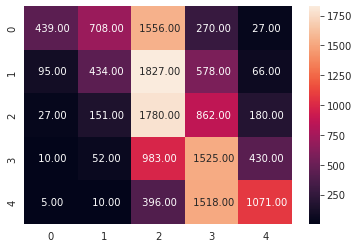

In [ ]:
# CM on a five point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_5P, df.Rating_5P_Textblob)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

<Axes: >

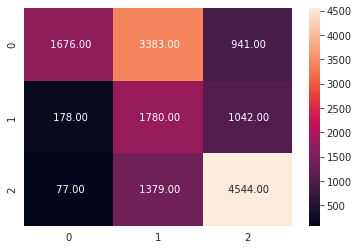

In [ ]:
# CM on a three point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_3P, df.Rating_3P_Textblob)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

In [ ]:
df.Rating_3P_Textblob.value_counts()

2    6542
3    6527
1    1931
Name: Rating_3P_Textblob, dtype: int64

In [ ]:
df.Rating_3P.value_counts()

1    6000
3    6000
2    3000
Name: Rating_3P, dtype: int64

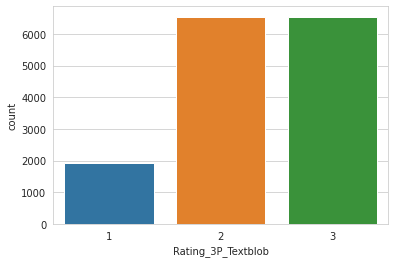

In [ ]:
ax = sns.countplot( x='Rating_3P_Textblob',data=df)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df.Rating_5P, df.Rating_5P_Textblob)

# Calculate sensitivity (also known as recall)
sensitivity = recall_score(df.Rating_5P, df.Rating_5P_Textblob, average="weighted")

# Calculate specificity
specificity = recall_score(df.Rating_5P, df.Rating_5P_Textblob, pos_label=0, average="weighted")

# Calculate F1 score
f1 = f1_score(df.Rating_5P, df.Rating_5P_Textblob, average="weighted")

In [ ]:
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

Accuracy: 0.38711804792262033
Sensitivity: 0.38711804792262033
Specificity: 0.38711804792262033
F1 Score: 0.48851579591483435


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df.Rating_3P, df.Rating_3P_Textblob)

# Calculate sensitivity (also known as recall)
sensitivity = recall_score(df.Rating_3P, df.Rating_3P_Textblob, average="weighted")

# Calculate specificity
specificity = recall_score(df.Rating_3P, df.Rating_3P_Textblob, pos_label=0, average="weighted")

# Calculate F1 score
f1 = f1_score(df.Rating_3P, df.Rating_3P_Textblob, average="weighted")

In [ ]:
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

Accuracy: 0.5333333333333333
Sensitivity: 0.5333333333333333
Specificity: 0.5333333333333333
F1 Score: 0.5338647982984019


In [ ]:
from sklearn import metrics
print(metrics.classification_report(df.Rating_5P, df.Rating_5P_Textblob))

              precision    recall  f1-score   support

           1       0.76      0.15      0.25      3000
           2       0.32      0.14      0.20      3000
           3       0.27      0.59      0.37      3000
           4       0.32      0.51      0.39      3000
           5       0.60      0.36      0.45      3000

    accuracy                           0.35     15000
   macro avg       0.46      0.35      0.33     15000
weighted avg       0.46      0.35      0.33     15000



In [ ]:
from sklearn import metrics
print(metrics.classification_report(df.Rating_3P, df.Rating_3P_Textblob))

              precision    recall  f1-score   support

           1       0.87      0.28      0.42      6000
           2       0.27      0.59      0.37      3000
           3       0.70      0.76      0.73      6000

    accuracy                           0.53     15000
   macro avg       0.61      0.54      0.51     15000
weighted avg       0.68      0.53      0.53     15000



#### Sentiment analysis using vader

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_scores(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.75:
        return 5
    elif score >= 0.5 and score < 0.75:
        return 4
    elif score > 0 and score < 0.5:
        return 3
    elif score > -0.5 and score <= 0:
        return 2
    else:
        return 1

In [ ]:
df["Rating_5P_Vader"] = df["Statement"].apply(sentiment_scores)

In [ ]:
df.head(10)

,Sentence,Rating,Sentiment,Rating_Textblob,Sentiment_Textblob,Rating_Vader
0,parking is easy and the parking fee is reasonable,5,3,4,3,3
1,this is one of the best aquarium,5,3,5,3,4
2,i was blown away by the exhibits.,5,3,3,2,2
3,everything was so cool,4,3,4,3,3
4,definitely worth seeing,4,3,4,3,4
5,we spent many hours to watch the marine life and it was very interesting,5,3,4,3,3
6,it is very nice,5,3,5,3,3
7,i will visit again.,4,3,3,2,2
8,it is an awesome site.,5,3,5,3,4
9,it is a great family outing,5,3,5,3,4


In [ ]:
df.loc[df['Rating_5P_Vader'].isin([4, 5]), 'Rating_3P_Vader'] = 3
df.loc[df['Rating_5P_Vader'].isin([3]), 'Rating_3P_Vader'] = 2
df.loc[df['Rating_5P_Vader'].isin([2, 1]), 'Rating_3P_Vader'] = 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Statement           15000 non-null  object
 1   Rating_5P           15000 non-null  int64 
 2   Rating_3P           15000 non-null  int64 
 3   Rating_5P_Textblob  15000 non-null  int64 
 4   Rating_3P_Textblob  15000 non-null  int64 
 5   Rating_5P_Vader     15000 non-null  int64 
 6   Rating_3P_Vader     15000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 937.5+ KB


In [ ]:
df['Rating_3P_Vader'] = df['Rating_3P_Vader'].astype('int64')

In [ ]:
# Confusion Matrix for the above

<Axes: >

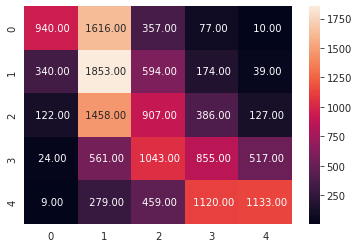

In [ ]:
# CM on a five point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_5P, df.Rating_5P_Vader)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

<Axes: >

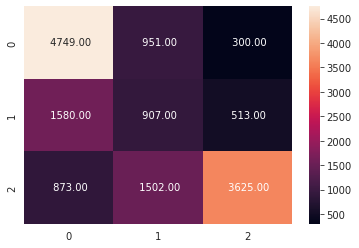

In [ ]:
# CM on a three point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_3P, df.Rating_3P_Vader)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df.Rating_5P, df.Rating_5P_Vader)

# Calculate sensitivity (also known as recall)
sensitivity = recall_score(df.Rating_5P, df.Rating_5P_Vader, average="weighted")

# Calculate specificity
specificity = recall_score(df.Rating_5P, df.Rating_5P_Vader, pos_label=0, average="weighted")

# Calculate F1 score
f1 = f1_score(df.Rating_5P, df.Rating_5P_Vader, average="weighted")

In [ ]:
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

Accuracy: 0.3792
Sensitivity: 0.3792
Specificity: 0.3792
F1 Score: 0.3812173362942421


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df.Rating_3P, df.Rating_3P_Vader)

# Calculate sensitivity (also known as recall)
sensitivity = recall_score(df.Rating_3P, df.Rating_3P_Vader, average="weighted")

# Calculate specificity
specificity = recall_score(df.Rating_3P, df.Rating_3P_Vader, pos_label=0, average="weighted")

# Calculate F1 score
f1 = f1_score(df.Rating_3P, df.Rating_3P_Vader, average="weighted")

In [ ]:
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

Accuracy: 0.6187333333333334
Sensitivity: 0.6187333333333334
Specificity: 0.6187333333333334
F1 Score: 0.6226496068740662


In [ ]:
from sklearn import metrics
print(metrics.classification_report(df.Rating_5P, df.Rating_5P_Vader))

              precision    recall  f1-score   support

           1       0.66      0.31      0.42      3000
           2       0.32      0.62      0.42      3000
           3       0.27      0.30      0.29      3000
           4       0.33      0.28      0.30      3000
           5       0.62      0.38      0.47      3000

    accuracy                           0.38     15000
   macro avg       0.44      0.38      0.38     15000
weighted avg       0.44      0.38      0.38     15000



In [ ]:
from sklearn import metrics
print(metrics.classification_report(df.Rating_3P, df.Rating_3P_Vader))

              precision    recall  f1-score   support

           1       0.66      0.79      0.72      6000
           2       0.27      0.30      0.29      3000
           3       0.82      0.60      0.69      6000

    accuracy                           0.62     15000
   macro avg       0.58      0.57      0.57     15000
weighted avg       0.64      0.62      0.62     15000



#### Sentiment Analysis using Pattern

In [ ]:
# !pip install pattern
import pandas as pd
from pattern.text.en import sentiment
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [ ]:
# Separate the target variable and the feature data
X = df["Statement"]
y = df["Rating_5P"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the sentiment analysis function using the pattern library
class PatternSentiment(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply sentiment analysis to each document in X
        return [self._pattern_sentiment(text) for text in X]
    
    def _pattern_sentiment(self, text):
        # Get the sentiment score for the text
        score = sentiment(text)[0]
    
        # Determine the sentiment label based on the score and threshold
        if score >= self.threshold:
            label = 5
        elif score >= self.threshold/2:
            label = 4
        elif score >= 0:
            label = 3
        elif score >= -self.threshold/2:
            label = 2
        else:
            label = 1
        
        return label

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('sentiment', PatternSentiment(threshold=0.0)),
    # Add additional transformers and classifiers as needed
])

In [ ]:
# Define the parameter grid to search over
param_grid = {'sentiment__threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
# Define the scorer to use for the grid search
scorer = {'Accuracy': make_scorer(accuracy_score), 'Sensitivity': make_scorer(accuracy_score, pos_label=5)}

In [ ]:
# Perform the grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, refit=False)

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sentiment',
                                        PatternSentiment(threshold=0.0))]),
             param_grid={'sentiment__threshold': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                  0.5]},
             refit=False,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'Sensitivity': make_scorer(accuracy_score, pos_label=5)})

In [ ]:
# Print the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)
print(results[['params', 'mean_test_Accuracy', 'mean_test_Sensitivity']])
print('Best parameters:', grid_search.best_params_)

                          params  mean_test_Accuracy  mean_test_Sensitivity
0  {'sentiment__threshold': 0.0}                 NaN                    NaN
1  {'sentiment__threshold': 0.1}                 NaN                    NaN
2  {'sentiment__threshold': 0.2}                 NaN                    NaN
3  {'sentiment__threshold': 0.3}                 NaN                    NaN
4  {'sentiment__threshold': 0.4}                 NaN                    NaN
5  {'sentiment__threshold': 0.5}                 NaN                    NaN


AttributeError: ignored

## Transformer based Models

#### Using BERT base uncased

In [ ]:
import pandas as pd
!pip install transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
from sklearn.metrics import classification_report

# Load the sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# Add the num_labels parameter to the pipeline method
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Apply the sentiment analysis pipeline to each sentence in the dataframe
sentiments = []
scores = []
for sentence in df['Statement']:
    result = classifier(sentence)[0]
    sentiment = result['label']
    score = result['score']
    sentiments.append(sentiment)
    scores.append(score)

# Add the sentiment and score columns to the dataframe
df['BERT_Uncased_Rating_5P'] = sentiments
df['BERT_score'] = scores

# Print the classification report
report = classification_report(df['Rating_5P'], df['BERT_Uncased_Rating_5P'], digits=3)
print(report)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df.head(10)

NameError: ignored

In [ ]:
df.BERT_Uncased_Rating_5P.value_counts()

LABEL_3    12783
LABEL_0     2203
LABEL_1       20
LABEL_2        4
LABEL_4        1
Name: BERT_Uncased_Rating_5P, dtype: int64

In [ ]:
# replace all occurrences of 5 and 4 with 3 and 1 and 2 with 1
df.BERT_Uncased_Rating_5P = df.BERT_Uncased_Rating_5P.replace({LABEL_4: 5, LABEL_3: 4, LABEL_2: 3, LABEL_1: 2, LABEL_0: 1})

NameError: ignored

#### Using RoBERTa base

In [ ]:
import pandas as pd
# !pip install transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
from sklearn.metrics import classification_report

# Load the sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained('roberta-base')
model = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

# Add the num_labels parameter to the pipeline method
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Apply the sentiment analysis pipeline to each sentence in the dataframe
sentiments = []
scores = []
for sentence in df['Statement']:
    result = classifier(sentence)[0]
    sentiment = result['label']
    score = result['score']
    sentiments.append(sentiment)
    scores.append(score)

# Add the sentiment and score columns to the dataframe
df['BERT_Uncased_Rating_5P'] = sentiments
df['BERT_score'] = scores

# Print the classification report
report = classification_report(df['Rating_5P'], df['BERT_Uncased_Rating_5P'], digits=3)
print(report)

In [ ]:
df.head(10)

#### Using DistillBert

#### Using XLNet

#### Using GPT-2

#### Using GPT-2 with finetuning on our dataset

#### ABSA (Aspect Based Sentiment Analysis using TextBlob)

In [ ]:
import nltk
from textblob import TextBlob
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define aspect terms
aspects = ['service', 'food', 'ambiance', 'price']

# Define function to calculate sentiment for each aspect
def get_aspect_sentiment(text):
    blob = TextBlob(text)
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = 0
        for sentence in blob.sentences:
            if aspect in sentence.lower():
                aspect_sentiments[aspect] += sentence.sentiment.polarity
    return aspect_sentiments

# Define function to calculate overall sentiment score on a 5-point scale
def get_sentiment_score(aspect_sentiments):
    total_sentiment = 0
    for aspect in aspects:
        total_sentiment += aspect_sentiments[aspect]
    avg_sentiment = total_sentiment / len(aspects)
    sentiment_score = round((avg_sentiment + 1) * 2.5)
    if sentiment_score == 0:
        sentiment_score = 1
    return sentiment_score

# Apply aspect-based sentiment analysis to each review
df['ABSA_sentiments'] = df['Statement'].apply(get_aspect_sentiment)

# Calculate overall sentiment score on a 5-point scale
df['ABSA_sentiment_score'] = df['ABSA_sentiments'].apply(get_sentiment_score)

df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,ABSA_sentiments,ABSA_sentiment_score
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.","{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.","{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,"{'service': 0.25, 'food': 0.25, 'ambiance': 0,...",3
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,"{'service': 0, 'food': 0, 'ambiance': 0, 'pric...",2


In [ ]:
df.ABSA_sentiment_score.value_counts()

2    13642
3     1344
1       19
4        6
Name: ABSA_sentiment_score, dtype: int64

## Using Neural Nets

#### LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['Statement'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['Statement'])
test_seq = tokenizer.texts_to_sequences(test_data['Statement'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['Rating_5P'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['Rating_5P'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['Rating_5P'], test_pred))


Epoch 1/10
338/338 [==============================] - 27s 73ms/step - loss: 1.6109 - accuracy: 0.1994 - val_loss: 1.6113 - val_accuracy: 0.2157
Epoch 2/10
338/338 [==============================] - 7s 19ms/step - loss: 1.6102 - accuracy: 0.2053 - val_loss: 1.6100 - val_accuracy: 0.2157
Epoch 3/10
338/338 [==============================] - 4s 13ms/step - loss: 1.6098 - accuracy: 0.1949 - val_loss: 1.6101 - val_accuracy: 0.1965
Epoch 4/10
338/338 [==============================] - 4s 12ms/step - loss: 1.6097 - accuracy: 0.2016 - val_loss: 1.6095 - val_accuracy: 0.1915
Epoch 5/10
338/338 [==============================] - 3s 10ms/step - loss: 1.6097 - accuracy: 0.2048 - val_loss: 1.6102 - val_accuracy: 0.1915
Epoch 6/10
338/338 [==============================] - 4s 10ms/step - loss: 1.6097 - accuracy: 0.1987 - val_loss: 1.6097 - val_accuracy: 0.2157
Epoch 7/10
338/338 [==============================] - 4s 11ms/step - loss: 1.6096 - accuracy: 0.2030 - val_loss: 1.6100 - val_accuracy: 0.191

In [ ]:
df.head()

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,Category,Entities
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,Commute,"[(zero, CARDINAL), (TSA Pre-Check, ORG)]"
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,Restaurant,"[(about 3, CARDINAL)]"
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,Restaurant,"[(8pm, TIME), (Sunday, DATE), (evening, TIME),..."
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.",Restaurant,[]
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.",Commute,[]


#### Using Bidirectional LSTM (BiLSTM)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['Statement'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['Statement'])
test_seq = tokenizer.texts_to_sequences(test_data['Statement'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the BiLSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['Rating_5P'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['Rating_5P'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['Rating_5P'], test_pred))


Epoch 1/10
338/338 [==============================] - 33s 83ms/step - loss: 1.2417 - accuracy: 0.4456 - val_loss: 1.0906 - val_accuracy: 0.5179
Epoch 2/10
338/338 [==============================] - 8s 23ms/step - loss: 0.9269 - accuracy: 0.6109 - val_loss: 1.0652 - val_accuracy: 0.5296
Epoch 3/10
338/338 [==============================] - 8s 22ms/step - loss: 0.7922 - accuracy: 0.6788 - val_loss: 1.1015 - val_accuracy: 0.5479
Epoch 4/10
338/338 [==============================] - 5s 14ms/step - loss: 0.6881 - accuracy: 0.7341 - val_loss: 1.1529 - val_accuracy: 0.5371
Epoch 5/10
338/338 [==============================] - 6s 18ms/step - loss: 0.6031 - accuracy: 0.7757 - val_loss: 1.2006 - val_accuracy: 0.5337
Epoch 6/10
338/338 [==============================] - 5s 15ms/step - loss: 0.5140 - accuracy: 0.8137 - val_loss: 1.3455 - val_accuracy: 0.5112
Epoch 7/10
338/338 [==============================] - 4s 13ms/step - loss: 0.4480 - accuracy: 0.8413 - val_loss: 1.4314 - val_accuracy: 0.521

#### Using Convolutional Neural Networks (CNN)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['Statement'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['Statement'])
test_seq = tokenizer.texts_to_sequences(test_data['Statement'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['Rating_5P'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['Rating_5P'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['Rating_5P'], test_pred))


Epoch 1/10
338/338 [==============================] - 28s 68ms/step - loss: 1.3176 - accuracy: 0.4094 - val_loss: 1.0964 - val_accuracy: 0.5487
Epoch 2/10
338/338 [==============================] - 6s 18ms/step - loss: 0.9353 - accuracy: 0.6090 - val_loss: 1.0372 - val_accuracy: 0.5654
Epoch 3/10
338/338 [==============================] - 4s 11ms/step - loss: 0.6813 - accuracy: 0.7371 - val_loss: 1.1262 - val_accuracy: 0.5304
Epoch 4/10
338/338 [==============================] - 4s 13ms/step - loss: 0.4313 - accuracy: 0.8479 - val_loss: 1.2685 - val_accuracy: 0.5379
Epoch 5/10
338/338 [==============================] - 4s 10ms/step - loss: 0.2194 - accuracy: 0.9353 - val_loss: 1.5553 - val_accuracy: 0.5412
Epoch 6/10
338/338 [==============================] - 2s 7ms/step - loss: 0.0962 - accuracy: 0.9750 - val_loss: 1.8320 - val_accuracy: 0.5204
Epoch 7/10
338/338 [==============================] - 3s 8ms/step - loss: 0.0430 - accuracy: 0.9919 - val_loss: 2.0611 - val_accuracy: 0.5312


#### Using Rerurrent Neural Networks (RNN)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['Statement'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['Statement'])
test_seq = tokenizer.texts_to_sequences(test_data['Statement'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['Rating_5P'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['Rating_5P'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['Rating_5P'], test_pred))


Epoch 1/10
338/338 [==============================] - 190s 548ms/step - loss: 1.6105 - accuracy: 0.2027 - val_loss: 1.6096 - val_accuracy: 0.2123
Epoch 2/10
338/338 [==============================] - 170s 502ms/step - loss: 1.6098 - accuracy: 0.1966 - val_loss: 1.6095 - val_accuracy: 0.1915
Epoch 3/10
338/338 [==============================] - 168s 498ms/step - loss: 1.6098 - accuracy: 0.2051 - val_loss: 1.6100 - val_accuracy: 0.1840
Epoch 4/10
338/338 [==============================] - 165s 490ms/step - loss: 1.6098 - accuracy: 0.2001 - val_loss: 1.6094 - val_accuracy: 0.2157
Epoch 5/10
338/338 [==============================] - 190s 560ms/step - loss: 1.6098 - accuracy: 0.1997 - val_loss: 1.6097 - val_accuracy: 0.1915
Epoch 6/10
338/338 [==============================] - 200s 591ms/step - loss: 1.6096 - accuracy: 0.2025 - val_loss: 1.6097 - val_accuracy: 0.1915
Epoch 7/10
338/338 [==============================] - 167s 494ms/step - loss: 1.6094 - accuracy: 0.2044 - val_loss: 1.6097 -

# Categorization 

## Topic Modeling

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing stopwords and special characters
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return tokens

docs = df['Statement'].apply(preprocess).tolist()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Build the dictionary and corpus
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Set the number of topics
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, 
                     alpha='auto', eta='auto', passes=10, iterations=100)

# Compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

# Print the topics
for idx, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))


Coherence Score: 0.44089668203216476
Topic: 0 
Words: ['aquarium', 'fish', 'blast', 'tour', 'fantastic', 'sharks', 'one', 'aquariums', 'exhibit', 'wax']
Topic: 1 
Words: ['great', 'place', 'time', 'fun', 'kids', 'good', 'family', 'park', 'go', 'day']
Topic: 2 
Words: ['staff', 'well', 'animals', 'nice', 'friendly', 'beautiful', 'zoo', 'clean', 'enjoyed', 'people']
Topic: 3 
Words: ['airport', 'get', 'easy', 'clean', 'busy', 'food', 'terminal', 'tsa', 'flight', 'one']
Topic: 4 
Words: ['open', 'closed', 'eat', 'restaurants', 'food', 'places', 'water', 'shops', 'late', 'night']


## Zero Shot Classification

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import pipeline

# define the zero-shot classification pipeline
classifier = pipeline('zero-shot-classification', device=0)

# define the candidate labels for classification
labels = ["Accessibility", "Website", "Bathrooms", "Cleanliness", "Crowd", "Discount", "Maintenence", "Parking", "Price", "Smoking", "Staff", "Restaurant"]

# define a function to classify the text
def classify_text(text):
    result = classifier(text, labels)
    return result['labels'][np.argmax(result['scores'])]

# apply the function to the 'text' column and create a new column for the classification result
df['zeroshot'] = df['Statement'].apply(lambda x: classify_text(x))

df.head(10)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,Category,Entities,zeroshot
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,Commute,"[(zero, CARDINAL), (TSA Pre-Check, ORG)]",Staff
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,Restaurant,"[(about 3, CARDINAL)]",Restaurant
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,Restaurant,"[(8pm, TIME), (Sunday, DATE), (evening, TIME),...",Restaurant
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.",Restaurant,[],Maintenence
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.",Commute,[],Crowd
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,Commute,[],Crowd
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,Restaurant,"[(CDC, ORG)]",Staff
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,Commute,"[(second, ORDINAL), (a month, DATE)]",Accessibility
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,Bathroom,"[(Spirit Airlines, ORG)]",Staff
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,Restaurant,[],Crowd


## Named Entity Recognition

In [ ]:
# To assist the SME on the Net / Sub-Net entities

import pandas as pd
import spacy

# Load the spaCy model for named entity recognition
nlp = spacy.load('en_core_web_sm')

# Define a function to perform NER on a single review
def perform_ner(review):
    doc = nlp(review)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

# Apply the NER function to the dataframe
df['Entities'] = df['Statement'].apply(perform_ner)

# Print the results
print(df.head())

  Industry                                          Statement  Rating_5P  \
0  Airport  Absolutely atrocious. If I could give zero sta...          1   
1  Airport  Almost all the restaurants close about 3 so if...          1   
2  Airport  8pm Sunday evening and ALL restaurants are clo...          1   
3  Airport         It was a Night mare,in every way possible.          1   
4  Airport              Always busy, wait times are terrible.          1   

   Rating_3P Emoji Extracted  \
0          1              []   
1          1              []   
2          1              []   
3          1              []   
4          1              []   

                               Abbreviated_Statement    Category  \
0  Absolutely atrocious. If I could give zero sta...     Commute   
1  Almost all the restaurants close about 3 so if...  Restaurant   
2  8pm Sunday evening and ALL restaurants are clo...  Restaurant   
3         It was a Night mare,in every way possible.  Restaurant   
4         

In [ ]:
df.head(20)

,Industry,Statement,Rating_5P,Rating_3P,Emoji Extracted,Abbreviated_Statement,Category,Entities
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,[],Absolutely atrocious. If I could give zero sta...,Commute,"[(zero, CARDINAL), (TSA Pre-Check, ORG)]"
1,Airport,Almost all the restaurants close about 3 so if...,1,1,[],Almost all the restaurants close about 3 so if...,Restaurant,"[(about 3, CARDINAL)]"
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,[],8pm Sunday evening and ALL restaurants are clo...,Restaurant,"[(8pm, TIME), (Sunday, DATE), (evening, TIME),..."
3,Airport,"It was a Night mare,in every way possible.",1,1,[],"It was a Night mare,in every way possible.",Restaurant,[]
4,Airport,"Always busy, wait times are terrible.",1,1,[],"Always busy, wait times are terrible.",Commute,[]
5,Airport,Very busy with no stopping had to ride the loo...,1,1,[],Very busy with no stopping had to ride the loo...,Commute,[]
6,Airport,You say you are following CDC guidelines and y...,1,1,[],You say you are following CDC guidelines and y...,Restaurant,"[(CDC, ORG)]"
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,[],Your lucky if your plane is fit to fly out of ...,Commute,"[(second, ORDINAL), (a month, DATE)]"
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,[],The staff that works for Spirit Airlines is ve...,Bathroom,"[(Spirit Airlines, ORG)]"
9,Airport,Very unorganized and bad customer support,1,1,[],Very unorganized and bad customer support,Restaurant,[]
